In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
X = np.random.rand(20, 2)
# X = np.array(X).reshape(-1, 2)
X # 2 features

array([[0.76558882, 0.83429456],
       [0.5295662 , 0.12555476],
       [0.73537854, 0.49324332],
       [0.35504217, 0.75622444],
       [0.60198126, 0.60339574],
       [0.66253302, 0.39433144],
       [0.87811719, 0.35666094],
       [0.99861917, 0.77895955],
       [0.87502814, 0.98879755],
       [0.99195848, 0.82519953],
       [0.93032133, 0.02815863],
       [0.76025227, 0.90073012],
       [0.8961324 , 0.25370051],
       [0.84207713, 0.45635988],
       [0.38018129, 0.13471312],
       [0.01877924, 0.88144064],
       [0.30870319, 0.6170043 ],
       [0.3584948 , 0.50297948],
       [0.91665418, 0.9244156 ],
       [0.77106215, 0.07773875]])

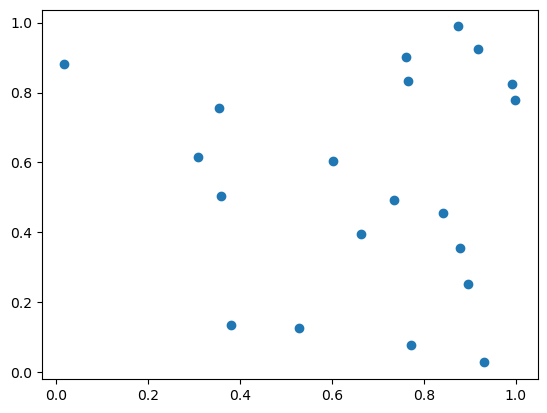

In [67]:
ax = plt.subplot(1, 1, 1)
ax.scatter(X[:, :1], X[:, 1:])

In [74]:
def k_means(k: int, X: np.ndarray):
    """
    k : int, number of clusters
    x1(ndarray) : feature 1
    x2(ndarray) : feature 2

    """
    
    m = len(X)
    
    if k > m:
        return None
    
    clusters = np.zeros(m)
    # randomly init centroids - best way is to pick k training examples
        
    random_indices = np.random.choice(len(X), replace=False, size=k)
    
    # print(random_indices) 
    centroids = X[random_indices]
    print("initial centroids: ", centroids)

    
    # iterative loop
    for i in range(500):
        for i in range(m):
            distance = np.zeros(k)
            for j in range(k):
                l2norm = np.linalg.norm(X[i] - centroids[j])
                distance[j] = l2norm
            # min distance
            cluster_index = np.argmin(distance) # returns index of lowest number
            clusters[i] = cluster_index
        
        # calc new centroids
        for i in range(k):
            # print("recalculating centroid for :", i)
            centroids[i] = np.mean(X[clusters == i])
            # print(centroids[i]) 
    # print(X[clusters == 0])
    return clusters, centroids

def cost_function():
    pass

In [75]:
clusters, centroids = k_means(2, X)

initial centroids:  [[0.35504217 0.75622444]
 [0.60198126 0.60339574]]


In [76]:
clusters

array([1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0.])

In [53]:
type(clusters) is np.ndarray

True

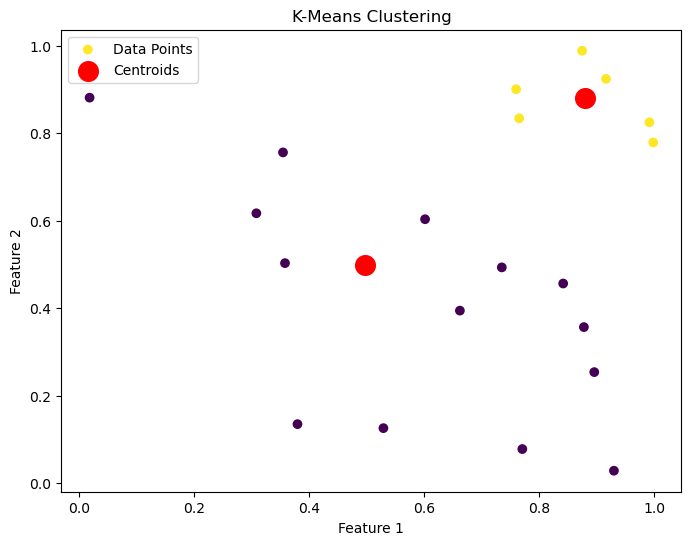

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))  # Create figure and axes

# Plot data points, colored by cluster if desired
# You can use the 'clusters' array to color-code the points
scatter = ax.scatter(X[:, 0], X[:, 1], c=clusters,
                     cmap='viridis', label='Data Points')

# Plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], marker="o", s=200,
           color="red", label='Centroids')  # Increased size for visibility

ax.set_title('K-Means Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend(*scatter.legend_elements(), title='Clusters')
ax.legend()
plt.show()  # Display the plot